# Zadanie II: Strażnik Cyberbezpieczeństwa – Ochrona Systemu
W tym zadaniu będziemy analizować logi serwera w celu wykrycia potencjalnych ataków hakerskich. Naszym celem jest stworzenie modelu detekcji anomalii, który pozwoli na identyfikację nietypowych zachowań w systemie. W pierwszej kolejności pobierzemy logi serwera z podanego adresu, a następnie przeprowadzimy ich analizę, aby zbudować model AI wykrywający anomalie. Na koniec przygotujemy raport zawierający wyniki naszej analizy, opis zidentyfikowanych anomalii oraz instrukcje uruchomienia modelu.

Starting training of anomaly detector...
Features shape: (14944, 8)
Checking data for NaN values and infinite values...
Data check completed.
Model training completed.
Anomaly detection completed.
Wykryto 1494 anomalii (10.00%)

Rozkład anomalii według metody HTTP:
method
POST    1153
GET      341
Name: count, dtype: int64

Rozkład anomalii według kodu statusu:
status
200    724
302    655
400    105
401      5
403      5
Name: count, dtype: int64


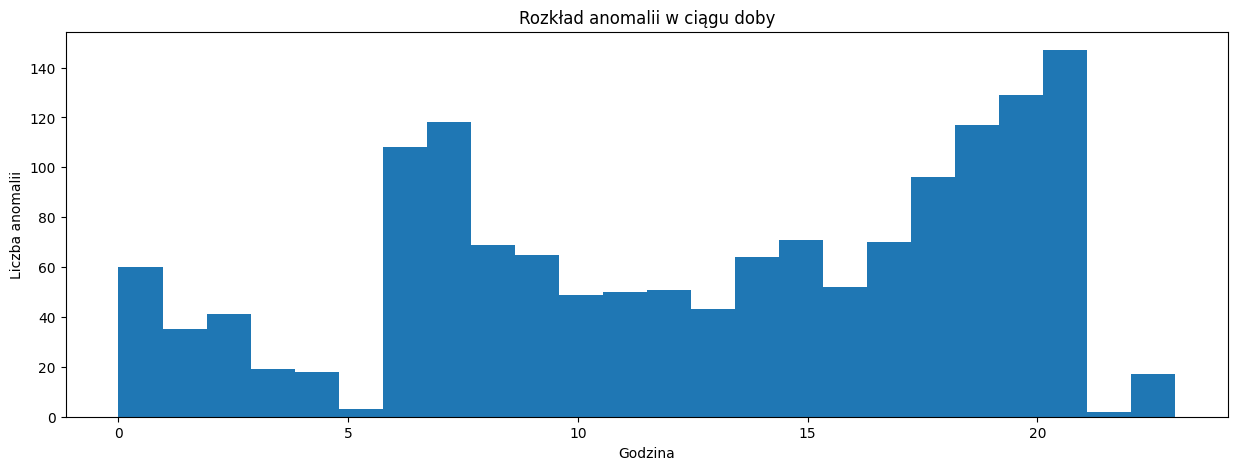


Raport bezpieczeństwa:

total_requests:
14944

unique_ips:
2194

total_anomalies:
1494

status_4xx:
115

status_5xx:
0

top_suspicious_ips:
ip
185.152.64.228     15
178.144.125.23     10
82.159.53.49        8
185.165.195.184     8
185.112.201.188     5
Name: count, dtype: int64

suspicious_paths:
path
/wylogowanie                                            655
/logowanie                                              152
/                                                       112
/rejestracja                                             17
/transakcja,a8b1505bad927e8d4b1dc9540e5979ca71a80084     15
Name: count, dtype: int64


In [ ]:
from model_definitions.StatisticalAnalyzer import StatisticalAnalyzer
try:
    analyzer = StatisticalAnalyzer("data/logs.csv")
    analyzer.load_data()
    analyzer.preprocess_data()

    # Trenowanie modelu
    analyzer.train_anomaly_detector(contamination=0.1)

    # Analiza anomalii
    anomalies = analyzer.analyze_anomalies()

    # Generowanie raportu
    report = analyzer.generate_security_report()
    print("\nRaport bezpieczeństwa:")
    for key, value in report.items():
        print(f"\n{key}:")
        print(value)
except Exception as e:
    print(f"An error occurred: {e}")
